# A4Q5

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

## (a)

In [2]:
def PageRankDense(G, alpha=0.9, tol=1e-8, max_iter=10000):
    """
    Basic PageRank using a dense (explicit) Google matrix.

    Parameters
    ----------
    G : np.ndarray
    alpha : float
    tol : float
    max_iter : int

    Returns
    -------
    p : np.ndarray
    it : int
    """

    n = G.shape[0]
    outdegree = G.sum(axis=0)
    dangling_mask = (outdegree == 0)
    outdegree[dangling_mask] = n
    P = (G + np.outer(np.ones(n), dangling_mask)) / outdegree
    M = alpha * P + (1 - alpha) / n * np.ones((n, n))
    p = np.ones(n) / n
    for it in range(1, max_iter + 1):
        p_new = M.dot(p)
        if np.linalg.norm(p_new - p, np.inf) < tol:
            return p_new, it
        p = p_new

    return p, max_iter

## (b)

Number of iterations: 22
Final PageRank vector: ['0.0389', '0.0399', '0.0738', '0.0625', '0.0329', '0.0400', '0.0635', '0.0989', '0.1029', '0.0638', '0.0209', '0.2137', '0.1154', '0.0329']
Pages in order of importance: [12 13  9  8  3 10  7  4  6  2  1 14  5 11]


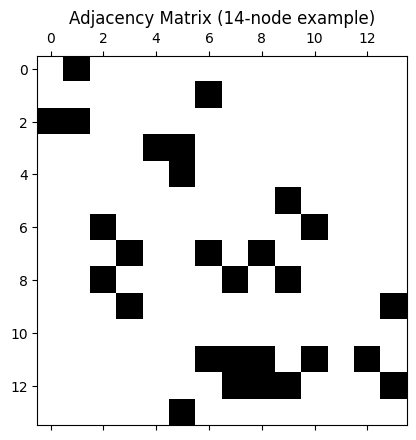

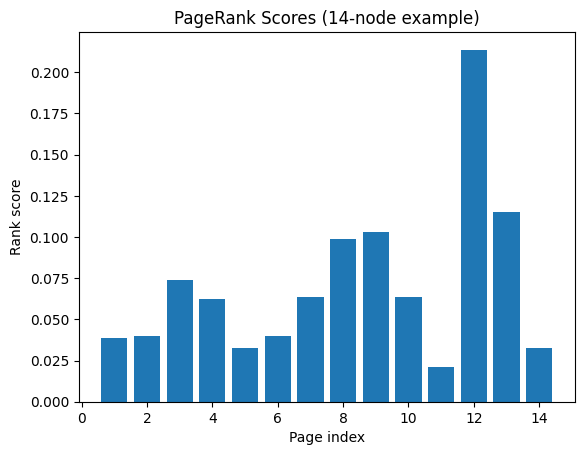

In [3]:
G = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

alpha = 0.9
p, it = PageRankDense(G, alpha=alpha)

print("Number of iterations:", it)
print("Final PageRank vector:", [f"{val:.4f}" for val in p])

# Sort pages by rank (descending order)
sorted_indices = np.argsort(p)[::-1] + 1
print("Pages in order of importance:", sorted_indices)

# Visualize adjacency matrix (spy)
plt.figure()
plt.spy(G)
plt.title("Adjacency Matrix (14-node example)")
plt.show()

# Bar chart of PageRank
plt.figure()
plt.bar(range(1, len(G) + 1), p)
plt.title("PageRank Scores (14-node example)")
plt.xlabel("Page index")
plt.ylabel("Rank score")
plt.show()

## (c)

In [4]:
def PageRankSparse(Gcsr, alpha=0.9, tol=1e-8, max_iter=10000):
    """
    Efficient PageRank using a sparse adjacency matrix (CSR).
    Avoids forming the full dense Google matrix.

    Parameters
    ----------
    Gcsr : csr_matrix
    alpha : float
    tol : float
    max_iter : int

    Returns
    -------
    p : np.ndarray
    it : int
    """

    n = Gcsr.shape[0]
    outdegree = np.array(Gcsr.sum(axis=0)).flatten()
    dangling_mask = (outdegree == 0)
    outdegree[dangling_mask] = 1
    p = np.ones(n) / n
    for it in range(1, max_iter + 1):
        part1 = alpha * Gcsr.dot(p / outdegree)
        part2 = alpha * dangling_mask.dot(p) / n
        part3 = (1 - alpha) / n
        p_new = part1 + part2 + part3
        if np.linalg.norm(p_new - p, np.inf) < tol:
            return p_new, it
        p = p_new

    return p, max_iter

## (d)

Number of iterations: 84

Top 20 URLs in descending order of importance:
 1. Page index = 0, rank score = 0.070215, url = ['http://www.bbc.com']
 2. Page index = 249, rank score = 0.017882, url = ['https://www.bbc.co.uk/news']
 3. Page index = 228, rank score = 0.017882, url = ['https://www.bbc.com/news']
 4. Page index = 22, rank score = 0.015760, url = ['http://www.bbcamerica.com']
 5. Page index = 18, rank score = 0.013769, url = ['http://www.bbc.com/future/story/20181024-the-best-age-to-learn-a-foreign-language']
 6. Page index = 14, rank score = 0.013495, url = ['http://www.bbc.com/future/story/20181026-how-one-sided-objects-like-a-mobius-strip-work']
 7. Page index = 44, rank score = 0.012824, url = ['https://www.bbcgoodfood.com']
 8. Page index = 58, rank score = 0.012743, url = ['https://www.bbc.com/news/business-45939984']
 9. Page index = 50, rank score = 0.012602, url = ['https://www.bbc.com/news/education-45979234']
10. Page index = 55, rank score = 0.012231, url = ['https:

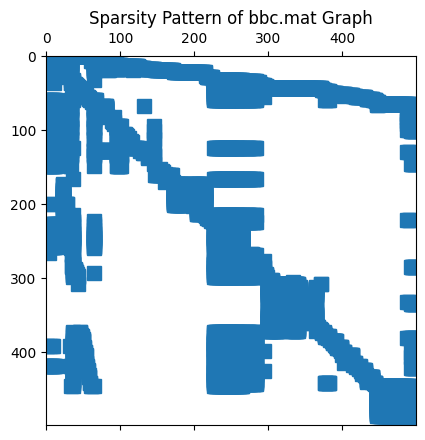

In [5]:
data = scipy.io.loadmat('bbc.mat')
Gcsr = data['G']
Gcsr = Gcsr.transpose()  # data uses the reverse adjacency matrix convention.
U = data['U']

# Compute the PageRank
alpha = 0.9
p, it = PageRankSparse(Gcsr, alpha=alpha)

print("Number of iterations:", it)

# Sort pages by rank (descending order)
sorted_indices = np.argsort(p)[::-1]

# Print top 20 URLs
print("\nTop 20 URLs in descending order of importance:")
top_k = 20
for rank_pos, idx in enumerate(sorted_indices[:top_k], start=1):
    url_str = U[idx][0] if U[idx].size > 0 else "Unknown"
    print(f"{rank_pos:2d}. Page index = {idx}, rank score = {p[idx]:.6f}, url = {url_str}")

# Plot the sparsity pattern
plt.figure()
plt.spy(Gcsr)
plt.title("Sparsity Pattern of bbc.mat Graph")
plt.show()